# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("adult.data.txt",header=None,names=["age", "workclass", "fnlwgt", "education", 
                                                "education-num", "marital-status", "occupation", 
                                                "relationship", "race", "sex", "capital-gain", 
                                                "capital-loss", "hours-per-week", "native-country", "50K"],
                 skipinitialspace=True)

In [38]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [12]:
S=df['sex'].value_counts()
print('мужчин ', np.array(S)[0],'женщин',np.array(S)[1])

мужчин  21790 женщин 10771


### Вопрос 2
Каков средний возраст мужчин?


In [14]:
M=df[df['sex']=='Male']['age'].mean()
print('средний возраст мужчин',M)

средний возраст мужчин 39.43354749885268


### Вопрос 3
Какова доля граждан США?

In [16]:
USA=df['native-country'].value_counts()
print('доля граждан США',np.array(USA)[0]/sum(np.array(USA)))

доля граждан США 0.895857006849


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

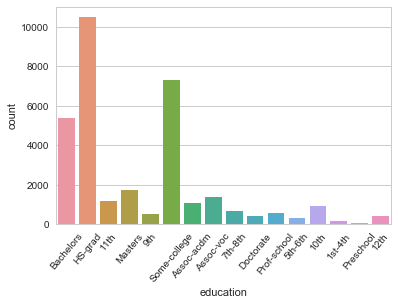

In [19]:
#seaborn
sns.set_style("whitegrid")
B=sns.countplot(x='education',data=df)
B.set_xticklabels(B.get_xticklabels(),rotation=50);
fig = B.get_figure()
fig.savefig("output.png")

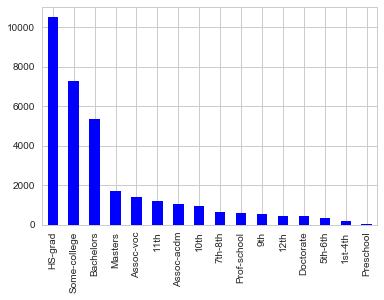

In [20]:
# обычный matplotlib
df['education'].value_counts().plot(kind='bar',color='blue');

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [45]:
print('среднее',df.groupby('marital-status')['fnlwgt'].mean()[0],
      'стандартное отклонение',df.groupby('marital-status')['fnlwgt'].std()[0])

среднее 185802 стандартное отклонение 105646.789459


In [48]:
#На всякий случай мб имеется в виду separated + divorced
print(df.groupby('marital-status')['fnlwgt'].mean(),
      df.groupby('marital-status')['fnlwgt'].std())

marital-status
Divorced                 185802
Married-AF-spouse        188165
Married-civ-spouse       186763
Married-spouse-absent    193141
Never-married            195383
Separated                206444
Widowed                  174159
Name: fnlwgt, dtype: int64 marital-status
Divorced                 105646.789459
Married-AF-spouse        139868.801057
Married-civ-spouse       103097.543007
Married-spouse-absent    114937.598735
Never-married            107765.354646
Separated                117601.326226
Widowed                   94005.379314
Name: fnlwgt, dtype: float64


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [21]:
df[df['50K']=='>50K']['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

### Правда

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [23]:
df.groupby(['race','sex'])['age'].nlargest(1)

race                sex          
Amer-Indian-Eskimo  Female  19515    80
                    Male    12492    82
Asian-Pac-Islander  Female  9147     75
                    Male    2303     90
Black               Female  19212    90
                    Male    222      90
Other               Female  26503    74
                    Male    12670    77
White               Female  1040     90
                    Male    1935     90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [24]:
df[df['occupation']=='Farming-fishing']['native-country'].value_counts().nlargest(2)

United-States    879
Mexico            77
Name: native-country, dtype: int64

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [29]:
b_m=np.array(df[df['education']=='Bachelors']['sex'].value_counts())
m_m=np.array(df[df['education']=='Masters']['sex'].value_counts())
rate_m=b_m[0]/m_m[0]
rate_f=b_m[1]/m_m[1]
print(rate_m,rate_f)

3.14743049705 3.02052238806


### Первое соотношение больше

### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [25]:
print('Максималное количество часов работы в неделю:', max(df['hours-per-week']))

Максималное количество часов работы в неделю: 99


In [26]:
l=0
for k in (np.array(df['hours-per-week'])):
    if k==99.0:
        l+=1
print(l,'человек работает 99,0 часов в неделю')

85 человек работает 99,0 часов в неделю


In [27]:
#вариант попроще 
df[df['hours-per-week']==df['hours-per-week'].max()]['hours-per-week'].value_counts()

99    85
Name: hours-per-week, dtype: int64

In [53]:
# Их заработок составляет в среднем
df[df['hours-per-week']==99.0]['capital-gain'].describe()

count       85.000000
mean       799.529412
std       2932.860012
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15024.000000
Name: capital-gain, dtype: float64

In [52]:
# Если имелось это в виду
df[df['hours-per-week']==df['hours-per-week'].max()]['50K'].value_counts()

<=50K    60
>50K     25
Name: 50K, dtype: int64